In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from collections import defaultdict

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.dummy import *

# 1.3 Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.dummy import DummyRegressor
import seaborn as sns
import pickle
from scipy.stats import spearmanr
from sklearn.inspection import permutation_importance
import time
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
df1 = pd.read_csv('ferm.csv', index_col=0, low_memory=False)
df2 = pd.read_csv('multiome_all.csv', index_col=0, low_memory=False)

In [3]:
df = df1.join(df2, lsuffix='_ferm', rsuffix='_resp')

In [4]:
df.shape

(4017, 350)

In [5]:
df.head()

,Molecule Type_ferm,∆ACO1_ferm,∆ACO2_ferm,∆AFG1_ferm,∆AFG3_ferm,∆AIM1_ferm,∆AIM25_ferm,∆AIM45_ferm,∆ARG5_ferm,∆ARO10_ferm,...,∆YLR253W_resp,∆YMC1_resp,∆YME1_resp,∆YME2_resp,∆YNK1_resp,∆YNL200C_resp,∆YPL109C_resp,∆YPR011C_resp,∆YPR098C_resp,∆YTA12_resp
Molecule Name,,,,,,,,,,,,,,,,,,,,,
2-Aminoadipic acid,Metabolite,0.105813,0.186528,0.021155,0.134079,0.023830,0.137408,-0.005947,-0.002167,-0.043112,...,0.062464,-0.240415,-0.288336,0.015382,-0.065253,-0.121216,0.017408,-0.135486,0.007603,-0.423365
2-Aminoheptanedioic acid,Metabolite,-0.046922,0.017442,NaN,0.019444,NaN,0.061292,NaN,0.006853,0.003939,...,-0.076417,0.054342,-0.075533,0.057787,-0.026580,-0.018729,-0.028484,0.017344,-0.023998,0.139293
2-Hydroxyglutaric acid,Metabolite,-0.160386,0.001247,NaN,0.023202,NaN,0.047440,NaN,0.040146,0.079808,...,-0.104570,0.123308,0.010166,0.105853,0.036476,0.015559,0.094804,0.021705,-0.026146,1.304837
2-Ketoglutaric acid,Metabolite,-3.100705,0.175777,-0.301172,-1.184277,-0.044801,0.602980,0.035784,0.076023,0.499469,...,NaN,-0.056086,-0.225929,0.110593,0.099505,0.144014,-0.240659,-0.026319,-0.761797,-3.262015
2-methylglyceric acid,Metabolite,0.152809,-0.005389,NaN,0.065120,NaN,-0.010126,NaN,0.023869,-0.078461,...,-0.112124,0.076747,-0.025162,0.160659,0.026205,0.061952,0.011081,0.048210,0.127693,0.153886


In [10]:
df.iloc[2,]

Molecule Type_ferm    Metabolite
∆ACO1_ferm             -0.160386
∆ACO2_ferm              0.001247
∆AFG1_ferm                   NaN
∆AFG3_ferm              0.023202
                         ...    
∆YNL200C_resp           0.015559
∆YPL109C_resp           0.094804
∆YPR011C_resp           0.021705
∆YPR098C_resp          -0.026146
∆YTA12_resp             1.304837
Name: 2-Hydroxyglutaric acid, Length: 350, dtype: object

In [11]:
df.iloc[1,1:]

∆ACO1_ferm      -0.046922
∆ACO2_ferm       0.017442
∆AFG1_ferm            NaN
∆AFG3_ferm       0.019444
∆AIM1_ferm            NaN
                   ...   
∆YNL200C_resp   -0.018729
∆YPL109C_resp   -0.028484
∆YPR011C_resp    0.017344
∆YPR098C_resp   -0.023998
∆YTA12_resp      0.139293
Name: 2-Aminoheptanedioic acid, Length: 349, dtype: object

In [12]:
cln = df.dropna()
cln.shape

(937, 350)

In [13]:
cln.iloc[:,1]

Molecule Name
AAP1 (YHR047c)    0.751019
ABF1 (YKL112W)    0.028802
ABF2 (YMR072w)   -0.350154
ACC1 (YNR016c)   -0.028257
ACO1 (YLR304c)   -6.671317
                    ...   
ZPR1 (YGR211w)    0.097760
ZRC1 (YMR243c)   -0.108935
ZTA1 (YBR046c)    0.413226
ZUO1 (YGR285c)   -0.190598
ZWF1 (YNL241C)   -0.092726
Name: ∆ACO1_ferm, Length: 937, dtype: float64

In [14]:
cln.iloc[1,:]

Molecule Type_ferm     Protein
∆ACO1_ferm            0.028802
∆ACO2_ferm            0.063491
∆AFG1_ferm            0.160664
∆AFG3_ferm            0.092154
                        ...   
∆YNL200C_resp        -0.067838
∆YPL109C_resp        -0.035062
∆YPR011C_resp         0.123657
∆YPR098C_resp        -0.022935
∆YTA12_resp           0.211829
Name: ABF1 (YKL112W), Length: 350, dtype: object

<AxesSubplot:>

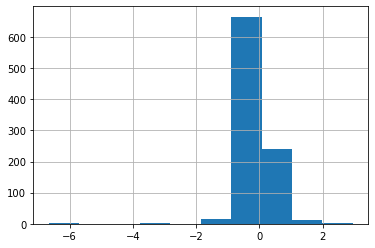

In [15]:
cln.iloc[:,1].hist()

In [16]:
cln

,Molecule Type_ferm,∆ACO1_ferm,∆ACO2_ferm,∆AFG1_ferm,∆AFG3_ferm,∆AIM1_ferm,∆AIM25_ferm,∆AIM45_ferm,∆ARG5_ferm,∆ARO10_ferm,...,∆YLR253W_resp,∆YMC1_resp,∆YME1_resp,∆YME2_resp,∆YNK1_resp,∆YNL200C_resp,∆YPL109C_resp,∆YPR011C_resp,∆YPR098C_resp,∆YTA12_resp
Molecule Name,,,,,,,,,,,,,,,,,,,,,
AAP1 (YHR047c),Protein,0.751019,-0.016861,0.256383,0.213589,0.085396,0.071200,0.159166,-0.074533,-0.076910,...,0.104360,-0.145274,-0.018050,0.016820,-0.224921,0.043637,0.128156,0.004671,0.047887,0.447347
ABF1 (YKL112W),Protein,0.028802,0.063491,0.160664,0.092154,-0.016851,0.083002,-0.046234,-0.009823,0.103872,...,0.019639,0.182225,0.096255,0.164159,-0.014874,-0.067838,-0.035062,0.123657,-0.022935,0.211829
ABF2 (YMR072w),Protein,-0.350154,-0.072165,0.044126,-0.339290,0.079841,0.102839,-0.037274,-0.019201,0.081535,...,-0.033673,0.087844,0.006192,0.053041,-0.226512,-0.194525,-0.020600,0.103124,0.167302,-0.715571
ACC1 (YNR016c),Protein,-0.028257,-0.078073,0.028136,0.034625,0.098908,0.002011,-0.042940,0.151140,-0.002208,...,0.298097,0.223406,0.514546,-0.120046,0.017379,-0.146952,0.388154,0.358105,-0.288019,-0.419743
ACO1 (YLR304c),Protein,-6.671317,0.089245,0.122311,1.535070,-0.061093,0.216090,0.234654,-0.015596,0.090036,...,-0.063711,-0.347006,-0.340689,-0.076134,-0.101655,0.123218,-0.303637,-0.026917,-0.041934,-1.067059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZPR1 (YGR211w),Protein,0.097760,0.107521,-0.188865,-0.544851,-0.063031,-0.026361,0.023289,-0.101657,-0.021450,...,0.112129,0.010742,0.022656,0.023003,-0.002474,-0.052660,0.080301,-0.064275,0.020902,0.063735
ZRC1 (YMR243c),Protein,-0.108935,0.096859,0.353060,-0.230110,-0.268208,0.024785,-0.124756,0.360410,0.162655,...,-0.353746,-0.051600,-0.226267,0.062708,0.017760,0.117796,0.073009,0.135610,0.098139,0.268805
ZTA1 (YBR046c),Protein,0.413226,0.042446,0.161205,1.481629,0.098579,0.096035,0.106340,-0.224691,-0.259273,...,0.172521,-0.158325,-0.133670,-0.029616,0.115582,-0.116475,0.198472,0.000348,0.172457,-0.544553


In [33]:
protein = cln.loc[cln['Molecule Type_ferm'].isin(['Protein'])]
protein = protein.drop(columns=['Molecule Type_ferm', 'Molecule Type_resp'])
protein.shape

(873, 348)

In [34]:
lipid = cln.loc[cln['Molecule Type_ferm'].isin(['Lipid'])]
lipid = lipid.drop(columns=['Molecule Type_ferm', 'Molecule Type_resp'])
lipid.shape

(50, 348)

In [35]:
met = cln.loc[cln['Molecule Type_ferm'].isin(['Metabolite'])]
met = met.drop(columns=['Molecule Type_ferm', 'Molecule Type_resp'])
met.shape

(14, 348)

In [36]:
df.head()

,Molecule Type_ferm,∆ACO1_ferm,∆ACO2_ferm,∆AFG1_ferm,∆AFG3_ferm,∆AIM1_ferm,∆AIM25_ferm,∆AIM45_ferm,∆ARG5_ferm,∆ARO10_ferm,...,∆YLR253W_resp,∆YMC1_resp,∆YME1_resp,∆YME2_resp,∆YNK1_resp,∆YNL200C_resp,∆YPL109C_resp,∆YPR011C_resp,∆YPR098C_resp,∆YTA12_resp
Molecule Name,,,,,,,,,,,,,,,,,,,,,
2-Aminoadipic acid,Metabolite,0.105813,0.186528,0.021155,0.134079,0.023830,0.137408,-0.005947,-0.002167,-0.043112,...,0.062464,-0.240415,-0.288336,0.015382,-0.065253,-0.121216,0.017408,-0.135486,0.007603,-0.423365
2-Aminoheptanedioic acid,Metabolite,-0.046922,0.017442,NaN,0.019444,NaN,0.061292,NaN,0.006853,0.003939,...,-0.076417,0.054342,-0.075533,0.057787,-0.026580,-0.018729,-0.028484,0.017344,-0.023998,0.139293
2-Hydroxyglutaric acid,Metabolite,-0.160386,0.001247,NaN,0.023202,NaN,0.047440,NaN,0.040146,0.079808,...,-0.104570,0.123308,0.010166,0.105853,0.036476,0.015559,0.094804,0.021705,-0.026146,1.304837
2-Ketoglutaric acid,Metabolite,-3.100705,0.175777,-0.301172,-1.184277,-0.044801,0.602980,0.035784,0.076023,0.499469,...,NaN,-0.056086,-0.225929,0.110593,0.099505,0.144014,-0.240659,-0.026319,-0.761797,-3.262015
2-methylglyceric acid,Metabolite,0.152809,-0.005389,NaN,0.065120,NaN,-0.010126,NaN,0.023869,-0.078461,...,-0.112124,0.076747,-0.025162,0.160659,0.026205,0.061952,0.011081,0.048210,0.127693,0.153886


# make full X data (proteins with KNN imputation)

In [37]:

pf = df.loc[df['Molecule Type_ferm'].isin(['Protein'])]
pf = pf.drop(columns = ['Molecule Type_ferm', 'Molecule Type_resp'])
kimpp = KNNImputer(n_neighbors=2, )
pfi = kimpp.fit_transform(pf)
X_data = np.asarray(pfi.T)
X_df = pd.DataFrame(data = pfi.T, index = pf.T.index, columns = pf.T.columns)

In [38]:
print(pf.shape)

(3690, 348)


In [39]:
pf.T.head()


Molecule Name,AAC1 (YMR056c),AAC3 (YBR085w),AAH1 (YNL141w),AAP1 (YHR047c),AAR2 (YBL074c),AAT1 (YKL106w),AAT2 (YLR027C),ABD1 (YBR236c),ABF1 (YKL112W),ABF2 (YMR072w),...,ZIM17 (YNL310C),ZPR1 (YGR211w),ZRC1 (YMR243c),ZRG17 (YNR039c),ZRT1 (YGL255w),ZRT3 (YKL175w),ZTA1 (YBR046c),ZUO1 (YGR285c),ZWF1 (YNL241C),coa6 (YMR244c-a)
∆ACO1_ferm,1.027358,-0.931070,-0.075490,0.751019,NaN,-0.216840,0.456241,0.025649,0.028802,-0.350154,...,0.145498,0.097760,-0.108935,-1.735153,-2.090227,0.718975,0.413226,-0.190598,-0.092726,NaN
∆ACO2_ferm,0.913050,-0.700856,-0.189610,-0.016861,NaN,-0.250856,0.037289,-0.008014,0.063491,-0.072165,...,0.105484,0.107521,0.096859,0.075786,-1.312650,0.480919,0.042446,-0.101847,0.015870,NaN
∆AFG1_ferm,0.478310,NaN,0.017919,0.256383,NaN,0.198294,0.005559,-0.005964,0.160664,0.044126,...,-0.191008,-0.188865,0.353060,NaN,NaN,0.080397,0.161205,-0.144780,-0.060676,NaN
∆AFG3_ferm,1.020635,-0.604662,-1.075854,0.213589,1.114418,-0.539066,0.653836,0.874242,0.092154,-0.339290,...,-0.083140,-0.544851,-0.230110,-0.404250,NaN,0.292918,1.481629,-0.119340,0.358215,0.083984
∆AIM1_ferm,0.944649,NaN,-0.012883,0.085396,NaN,0.333719,0.040886,0.082914,-0.016851,0.079841,...,0.900733,-0.063031,-0.268208,NaN,NaN,0.478339,0.098579,-0.177158,-0.080162,NaN


In [40]:
X_df.head()

Molecule Name,AAC1 (YMR056c),AAC3 (YBR085w),AAH1 (YNL141w),AAP1 (YHR047c),AAR2 (YBL074c),AAT1 (YKL106w),AAT2 (YLR027C),ABD1 (YBR236c),ABF1 (YKL112W),ABF2 (YMR072w),...,ZIM17 (YNL310C),ZPR1 (YGR211w),ZRC1 (YMR243c),ZRG17 (YNR039c),ZRT1 (YGL255w),ZRT3 (YKL175w),ZTA1 (YBR046c),ZUO1 (YGR285c),ZWF1 (YNL241C),coa6 (YMR244c-a)
∆ACO1_ferm,1.027358,-0.931070,-0.075490,0.751019,0.081753,-0.216840,0.456241,0.025649,0.028802,-0.350154,...,0.145498,0.097760,-0.108935,-1.735153,-2.090227,0.718975,0.413226,-0.190598,-0.092726,-0.206861
∆ACO2_ferm,0.913050,-0.700856,-0.189610,-0.016861,-0.047547,-0.250856,0.037289,-0.008014,0.063491,-0.072165,...,0.105484,0.107521,0.096859,0.075786,-1.312650,0.480919,0.042446,-0.101847,0.015870,-0.148295
∆AFG1_ferm,0.478310,0.309610,0.017919,0.256383,-0.067798,0.198294,0.005559,-0.005964,0.160664,0.044126,...,-0.191008,-0.188865,0.353060,0.055466,-0.036283,0.080397,0.161205,-0.144780,-0.060676,0.049095
∆AFG3_ferm,1.020635,-0.604662,-1.075854,0.213589,1.114418,-0.539066,0.653836,0.874242,0.092154,-0.339290,...,-0.083140,-0.544851,-0.230110,-0.404250,0.415888,0.292918,1.481629,-0.119340,0.358215,0.083984
∆AIM1_ferm,0.944649,0.210585,-0.012883,0.085396,0.014639,0.333719,0.040886,0.082914,-0.016851,0.079841,...,0.900733,-0.063031,-0.268208,-0.048723,0.141479,0.478339,0.098579,-0.177158,-0.080162,0.034016


# Make metabolite data

In [46]:
mf = df.loc[df['Molecule Type_ferm'].isin(['Metabolite'])]
mf = mf.drop(columns = ['Molecule Type_ferm', 'Molecule Type_resp'])
kimpm = KNNImputer(n_neighbors=2)
mfi = kimpm.fit_transform(mf)
m_data = np.asarray(mfi.T)
m_df = pd.DataFrame(data = mfi.T, index = mf.T.index, columns = mf.T.columns)

In [47]:
m_df.head()

Molecule Name,2-Aminoadipic acid,2-Aminoheptanedioic acid,2-Hydroxyglutaric acid,2-Ketoglutaric acid,2-methylglyceric acid,2-phosphoplgyceric acid,3-deoxytetronic acid,4-aminobutanoic acid,4-hydroxybenzaldehyde (4-HBZ),4-hydroxybenzoic acid,...,"Unidentified metabolite, RT 8.3297 (F)","Unidentified metabolite, RT 9.359 (F)","Unidentified metabolite, RT 9.4329 (F)",Uracil,Urea,Uridine,Valine,Xanthine,d-Aminolevulinic acid,p-aminobenzoic acid (paba)
∆ACO1_ferm,0.105813,-0.046922,-0.160386,-3.100705,0.152809,-0.068557,0.097576,0.092380,0.111254,0.039976,...,0.247575,0.757754,-0.850374,0.151996,0.051869,0.526726,0.170861,0.096989,0.212538,0.029519
∆ACO2_ferm,0.186528,0.017442,0.001247,0.175777,-0.005389,0.011207,-0.020897,-0.045765,-0.055550,0.018527,...,0.017319,0.345852,-1.143264,-0.147294,-0.037701,-0.061551,-0.011697,0.045880,-0.062647,0.016182
∆AFG1_ferm,0.021155,-0.090160,0.005798,-0.301172,-0.090160,-0.415929,-0.149219,0.126804,0.106055,0.005798,...,-0.073572,0.273151,-0.955179,-0.090841,-0.102052,0.385031,0.034921,-0.139681,-0.081586,-0.089379
∆AFG3_ferm,0.134079,0.019444,0.023202,-1.184277,0.065120,-0.514369,0.049403,-0.097135,-0.058410,-0.131066,...,-0.191740,-0.144094,-0.104224,-0.075256,0.006250,-0.172135,-0.006362,0.044979,-0.240934,-0.103350
∆AIM1_ferm,0.023830,-0.081785,-0.005057,-0.044801,-0.081785,-0.411698,-0.098746,0.084657,0.046107,-0.005057,...,-0.027018,0.299259,-0.707151,-0.156239,0.056154,0.154470,0.054428,-0.126495,-0.338774,-0.017760


In [48]:
met.T.head()

Molecule Name,Aspartic Acid,Biotin,Citric acid,Fumaric acid,Malic acid,Orotic Acid,"Unidentified metabolite, RT 13.4093","Unidentified metabolite, RT 13.7754","Unidentified metabolite, RT 15.2271","Unidentified metabolite, RT 15.6883","Unidentified metabolite, RT 18.1647","Unidentified metabolite, RT 19.3586","Unidentified metabolite, RT 20.8307","Unidentified metabolite, RT 24.0266"
∆ACO1_ferm,0.235656,-0.430319,0.674584,-0.078033,-0.208331,-1.404887,0.012682,0.032268,0.078658,0.377962,-0.447998,-0.052325,0.021573,0.086789
∆ACO2_ferm,-0.069608,-0.071711,0.064713,-0.014937,0.007807,-0.013839,0.015107,-0.010092,0.054792,0.144064,-0.613015,-0.101174,-0.150682,0.075861
∆AFG1_ferm,0.266743,0.133348,-0.058175,0.041785,0.067030,0.330998,-0.093141,-0.070497,-0.107470,-0.071857,-0.071746,-0.235871,-0.081330,-0.072293
∆AFG3_ferm,0.196812,-1.745697,1.295234,-0.098605,-0.140285,-2.232179,0.058073,0.068515,0.045176,0.035042,0.124789,-0.060684,0.034559,-0.171150
∆AIM1_ferm,0.360779,0.180801,-0.022616,0.091055,0.176234,0.482570,0.027450,-0.007479,-0.071483,0.050435,-0.149174,-0.212003,-0.179751,-0.043942


In [49]:
m_df.shape

(348, 273)

# Make X_data and y_data from the matrix

In [50]:
pf.T.index

Index(['∆ACO1_ferm', '∆ACO2_ferm', '∆AFG1_ferm', '∆AFG3_ferm', '∆AIM1_ferm',
       '∆AIM25_ferm', '∆AIM45_ferm', '∆ARG5_ferm', '∆ARO10_ferm', '∆ATG1_ferm',
       ...
       '∆YLR253W_resp', '∆YMC1_resp', '∆YME1_resp', '∆YME2_resp', '∆YNK1_resp',
       '∆YNL200C_resp', '∆YPL109C_resp', '∆YPR011C_resp', '∆YPR098C_resp',
       '∆YTA12_resp'],
      dtype='object', length=348)

In [51]:
ml_df = l_df.join(m_df)
ml_data = np.asarray(ml_df)

# Split train/test

In [52]:
train_index, test_index= train_test_split(range(len(X_data)),
                                                              test_size = 0.10, 
                                                              random_state = 42)
print(len(train_index))
print(len(test_index))

313
35


In [53]:
## replace this with the using indexes
pro_train_all, pro_test, met_train_all, met_test = train_test_split(X_df, 
                                                              mfi.T, 
                                                              test_size = 0.10, 
                                                              random_state = 42)

pro_train_all, pro_test, lip_train_all, lip_test = train_test_split(X_df,
                                                                      lfi.T,
                                                                      test_size = 0.10,
                                                                      random_state = 42)

pro_train_all, pro_test, ml_train_all, ml_test = train_test_split(X_df,
                                                                      ml_df,
                                                                      test_size = 0.10,
                                                                      random_state = 42)

pro_train, pro_val, met_train, met_val = train_test_split(pro_train_all, met_train_all, 
                                                          test_size = 0.11, random_state = 42)

pro_train, pro_val, lip_train, lip_val = train_test_split(pro_train_all, lip_train_all,
                                                          test_size = 0.11, random_state = 42)


print('Training Prot Shape:', pro_train.shape)
print('Training met Shape:', met_train.shape)
print('Training lip Shape:', lip_train.shape)

print('Training lip Shape:', ml_train_all.shape)

print('Validation Prot Shape:', pro_val.shape)
print('Validation met Shape:', met_val.shape)
print('Validation met Shape:', lip_val.shape)

print('Testing Prot Shape:', pro_test.shape)
print('Testing met Shape:', met_test.shape)
print('Testing lip Shape:', lip_test.shape)

Training Prot Shape: (278, 3690)
Training met Shape: (278, 273)
Training lip Shape: (278, 54)
Training lip Shape: (313, 327)
Validation Prot Shape: (35, 3690)
Validation met Shape: (35, 273)
Validation met Shape: (35, 54)
Testing Prot Shape: (35, 3690)
Testing met Shape: (35, 273)
Testing lip Shape: (35, 54)


In [54]:
pro_train_all

Molecule Name,AAC1 (YMR056c),AAC3 (YBR085w),AAH1 (YNL141w),AAP1 (YHR047c),AAR2 (YBL074c),AAT1 (YKL106w),AAT2 (YLR027C),ABD1 (YBR236c),ABF1 (YKL112W),ABF2 (YMR072w),...,ZIM17 (YNL310C),ZPR1 (YGR211w),ZRC1 (YMR243c),ZRG17 (YNR039c),ZRT1 (YGL255w),ZRT3 (YKL175w),ZTA1 (YBR046c),ZUO1 (YGR285c),ZWF1 (YNL241C),coa6 (YMR244c-a)
∆FMP40_ferm,0.047637,-0.006668,-0.172729,-0.011075,0.290285,-0.066712,0.042154,0.023856,0.135258,0.135579,...,0.183586,-0.039591,-0.117804,-0.084507,-0.772256,-0.225941,0.126064,-0.012601,0.050113,0.600410
∆EMC6_ferm,-0.046869,0.039059,-0.088535,0.120546,-0.019901,0.108467,-0.101967,0.052949,0.021170,0.032160,...,-0.171035,0.114423,-0.053724,-0.013561,-0.323682,-0.037947,-0.236446,-0.005708,0.041526,-0.031103
∆COQ8_ferm,-0.011721,-0.283675,-0.200855,0.209266,-0.067393,-0.288907,0.279415,-0.007340,0.014956,-0.042974,...,-0.257338,0.045997,-0.385247,-0.395868,-1.460453,0.154610,0.421243,-0.108719,0.251254,-0.143656
∆FMP42_resp,0.181011,0.146656,-0.103947,-0.029151,0.004236,-0.105065,-0.018644,0.163136,-0.010272,0.075577,...,-0.210970,-0.027879,-0.037602,-0.189607,0.049878,0.242443,0.174137,-0.064560,-0.028791,0.019368
∆YLF2_resp,0.227460,0.031518,-0.270960,0.150171,0.032194,-0.063489,0.153989,0.246880,-0.077488,0.140831,...,-0.302885,-0.055382,0.040534,-0.129919,-0.380733,0.234171,0.392139,-0.113624,-0.162459,0.191849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
∆ATP3_resp,-1.418110,-1.330481,-1.015563,0.030038,0.204659,-0.880269,0.255783,0.139988,-0.071601,-0.582019,...,0.420295,-0.185492,0.078780,-0.841088,-0.820626,0.200105,0.189781,0.249733,0.199851,0.057678
∆IMO32_ferm,0.523483,-0.531251,0.012648,0.163501,0.038070,0.063174,0.049177,-0.170229,0.030461,0.089844,...,0.892281,0.010846,0.149227,0.103919,-0.053129,0.180309,0.229916,0.073197,0.014968,0.041787
∆MRX3_ferm,0.193206,0.068300,-0.084356,0.018731,-0.065048,0.003252,-0.117245,-0.130762,0.067750,0.034800,...,-0.009235,0.074296,0.210259,-0.254139,-1.258307,0.139752,0.210254,-0.070239,0.149625,-0.095524
∆MMM1_resp,-2.253985,-2.217771,1.137577,0.507839,-0.074947,0.048444,-0.131776,0.253076,0.147415,-0.927764,...,-0.372965,-0.263928,-0.169370,-0.293220,-2.022716,-0.304220,-0.805099,0.000914,0.342809,-0.193544


# START HERE to Load saved data

In [55]:
import seaborn as sns

In [56]:
def model_eval(model, model_name, XTRAIN, XTEST,YTRAIN, YTEST):
    model.fit(XTRAIN, YTRAIN)
    YPRED = model.predict(XTEST)
    print('Mean squared error: %.4f'
      % mean_squared_error(YTEST, YPRED))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.4f'
      % r2_score(YTEST, YPRED))
    # Plot outputs
    plt.rcParams['figure.figsize'] = 5,5
    #sns.jointplot(YTEST, YPRED,  color='black', kind='reg')
    plt.scatter(YTEST, YPRED, color='blue')
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.subplots_adjust(top=0.9)
    plt.suptitle(model_name, fontsize = 16)
    plt.show()
    return mean_squared_error(YTEST, YPRED), r2_score(YTEST, YPRED)

In [57]:
## try many models
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor


# Hyperparameter search

In [58]:
md = np.arange(10,90,20)
md = np.append(md, None)
search_params = {
        'max_depth': md,
        'min_samples_leaf': [1,2,5],
        'min_samples_split':[2,5,10],
        'max_features': ['log2', 'auto', 'sqrt'],
        'n_estimators': [500, 1000, 1500]
    }

In [59]:
from sklearn.model_selection import ParameterGrid

In [80]:
# grid search - depth and estimators
etgs_met = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state = 42),
    param_grid=search_params,
    cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_result_met = etgs_met.fit(pro_train_all, met_train_all)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [81]:
et_best_met = grid_result_met.best_estimator_
et_best_met

ExtraTreesRegressor(max_depth=50, n_estimators=500, random_state=42)

In [82]:
et_best_met.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [88]:
#from joblib import dump, load


filename = 'best_et_met.pickle'
pickle.dump(et_best_met, open(filename, 'wb'))


In [61]:
with open('best_et_met.pickle', 'rb') as fh:
    et_best_met = pickle.load(fh)

C:\Users\jesmeyer\Anaconda3\envs\sklearn\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\jesmeyer\Anaconda3\envs\sklearn\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
